# Plan

Questions:
- Which are top 10 most earning hosts?
- Which are the top regions area?
- Which are the top neighbourhoods?  
- Which are the top listing words?
- What are the room types?
- Which are most reviewed listings?
- What is the average price per night?


## Exploratory data analysis
- Load python libraries:  
`pandas`  
`numpy`  
`matplotlib.pyplot`  
`matplotlib.image`
`%matplotlib inline`  
`seaborn`  
  
    
    
- Load dataset:  
`Airbnb Berlin listings_summary.csv`
  

- Understanding data:  
Number of columns and rows ? `listings_s.shape`  
Type of data ? `listings_s.dtypes`  
Which are the regions ? `listings_s['neighbourhood_group'].unique()`  
Which are the neigbourhoods ? `listings_s['neighbourhood'].unique()`  
What are the room types ? `listings_s['room_type'].unique()`  


- Cleaning dataset:  
Checking column with missing values `listings_s.isnull().sum()`  
Processing missing values - remove or refill  

  
- Exploring and visualizing data:  
How many hosts are there?  
How many of them are superhosts?  
Which are top 10 host with the most l istings?  
Which are top 10 most earning hosts? -> `estimated profit = price * minimum_nights * number_of_reviews'`  
What are the proportion of room types?  
Which are the top regions area? -> `Proportion of the listing_count on each region area`  
Which are the top neighbourhoods? -> `Proportion of the listing_count on each neigbourhood`    
Listing map   
Price    
What is the median price?  
What is the average price per night?  
What is the cheapest accommodation?  
What is the most expensive accommodation?  
Price map `Tableau`  
Price distribution with box plot for each region   
Price distribution by type of room  
Which are the top listing words? -> `Frequency distribution of listings words`    
Which are most reviewed listings? -> `Based on their number of reviews`    





## Predictions
- Correlation matrix

---

# Exploratory data analysis

## Import python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap

## Load data sets

In [3]:
df = pd.read_csv('D:/Data Science/Ironhack/GitHub/Project-Week-5-Your-Own-Project/data/listings_summary.csv')

listings_s = df.copy()

listings_s

id                                               name    host_id  \
0          1944         bright & airy Pberg/Mitte 3 months or more       2164   
1          2015   Berlin-Mitte Value! Quiet courtyard/very central       2217   
2          3176                    Fabulous Flat in great Location       3718   
3          3309                  BerlinSpot Schöneberg near KaDeWe       4108   
4          6883  Stylish East Side Loft in Center with AC & 2 b...      16149   
...         ...                                                ...        ...   
19853  48597066  Rollstuhlgeeignete Wohnung für zwei in Hönow M...  392062170   
19854  48599795                          Lichtdurchflutete Wohnung  392048619   
19855  48600069                    Bright Twin Capacity 1 At Mitte  175128252   
19856  48602039                                 One Room Apartment  235188041   
19857  48615659           Schönes, ruhiges Zimmer am Kufürstendamm  258728855   

           host_name       neighbourhood_group             neighbourhood  \
0              Lulah                     Mitte          Brunnenstr. Nord   
1                Ion                     Mitte           Brunnenstr. Süd   
2             Britta                    Pankow   Prenzlauer Berg Südwest   
3               Jana    Tempelhof - Schöneberg           Schöneberg-Nord   
4            Steffen  Friedrichshain-Kreuzberg  Frankfurter Allee Süd FK   
...              ...                       ...                       ...   
19853           Olaf     Marzahn - Hellersdorf          Hellersdorf-Nord   
19854        Mohamed    Tempelhof - Schöneberg                 Tempelhof   
19855  Team Gospodin                     Mitte            Alexanderplatz   
19856         Pedram  Friedrichshain-Kreuzberg  Frankfurter Allee Süd FK   
19857            NaN      Charlottenburg-Wilm.       Düsseldorfer Straße   

       latitude  longitude        room_type  price  minimum_nights  \
0      52.54425   13.39749     Private room     20              60   
1      52.53454   13.40256  Entire home/apt     59               5   
2      52.53500   13.41758  Entire home/apt     90              62   
3      52.49885   13.34906     Private room     29               7   
4      52.51171   13.45477  Entire home/apt     79               7   
...         ...        ...              ...    ...             ...   
19853  52.54192   13.60749  Entire home/apt     22              15   
19854  52.45901   13.41783  Entire home/apt     80               2   
19855  52.51105   13.40680     Private room   1840               1   
19856  52.49805   13.46587  Entire home/apt     25               7   
19857  52.49407   13.32443     Private room     22               2   

       number_of_reviews last_review  reviews_per_month  \
0                     18  2018-11-11               0.20   
1                    135  2021-02-12               2.24   
2                    147  2021-01-01               1.03   
3                     27  2019-05-31               0.29   
4                    135  2021-01-23               1.00   
...                  ...         ...                ...   
19853                  0         NaN                NaN   
19854                  0         NaN                NaN   
19855                  0         NaN                NaN   
19856                  0         NaN                NaN   
19857                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  
0                                   3               251  
1                                   6               173  
2                                   1               348  
3                                   1               364  
4                                   1                 0  
...                               ...               ...  
19853                               1                88  
19854                               1               161  
19855                               1               274

In [287]:
df2 = pd.read_csv('D:/Data Science/Ironhack/GitHub/Project-Week-5-Your-Own-Project/data/listings_detail.csv')

listings_d = df2.copy()

listings_d.head()

id                        listing_url       scrape_id last_scraped  \
0  1944  https://www.airbnb.com/rooms/1944  20210312174442   2021-03-14   
1  2015  https://www.airbnb.com/rooms/2015  20210312174442   2021-03-20   
2  3176  https://www.airbnb.com/rooms/3176  20210312174442   2021-03-15   
3  3309  https://www.airbnb.com/rooms/3309  20210312174442   2021-03-14   
4  6883  https://www.airbnb.com/rooms/6883  20210312174442   2021-03-20   

                                                name  \
0         bright & airy Pberg/Mitte 3 months or more   
1   Berlin-Mitte Value! Quiet courtyard/very central   
2                    Fabulous Flat in great Location   
3                  BerlinSpot Schöneberg near KaDeWe   
4  Stylish East Side Loft in Center with AC & 2 b...   

                                         description  \
0  Private, bright and friendly room. You'd be sh...   
1  Great location!  <br />30 of 75 sq meters. Thi...   
2  This beautiful first floor apartment  is situa...   
3  First of all:<br />I prefer short-notice booki...   
4  This apartment is available for people working...   

                               neighborhood_overview  \
0  near all the trendy cafés and flea markets and...   
1  It is located in the former East Berlin area o...   
2  The neighbourhood is famous for its variety of...   
3  My flat is in the middle of West-Berlin, direc...   
4  The emerging and upcoming East of the new hip ...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/107924758/1f4...     2164   
1  https://a0.muscache.com/pictures/260fd609-710a...     2217   
2  https://a0.muscache.com/pictures/243355/84afcf...     3718   
3  https://a0.muscache.com/pictures/29054294/b1fa...     4108   
4  https://a0.muscache.com/pictures/06b77d9b-4843...    16149   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/2164  ...                         9.0   
1   https://www.airbnb.com/users/show/2217  ...                        10.0   
2   https://www.airbnb.com/users/show/3718  ...                         9.0   
3   https://www.airbnb.com/users/show/4108  ...                        10.0   
4  https://www.airbnb.com/users/show/16149  ...                        10.0   

  review_scores_location review_scores_value            license  \
0                    9.0                 8.0                NaN   
1                   10.0                 9.0                NaN   
2                   10.0                 9.0                NaN   
3                    9.0                 9.0                NaN   
4                   10.0                10.0  02/Z/RA/008250-18   

  instant_bookable calculated_host_listings_count  \
0                f                              3   
1                f                              6   
2                f                              1   
3                f                              1   
4                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           6   
2                                           1   
3                                           0   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.20  
1                                           0              2.24  
2                                           0              1.03  
3                                           0              0.29  
4                            

## Understanding data

### Number of columns and rows ? 

In [4]:
listings_s.shape

(19858, 16)

We have 19858 listings and 16 columns which include `host_id`, `neigbourhood_group`, `latitude`, `longtitude`, `price` and so on. 

### Types of data ? 

In [5]:
listings_s.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Which are the regions ?

In [6]:
listings_s['neighbourhood_group'].unique()

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Neukölln', 'Reinickendorf',
       'Steglitz - Zehlendorf', 'Lichtenberg', 'Marzahn - Hellersdorf',
       'Spandau'], dtype=object)

![regions](images/region.png)

From the map above, we see that Berlin has 12 region area. 

### Which are the neighborhoods ? 

In [7]:
listings_s['neighbourhood'].unique()

array(['Brunnenstr. Nord', 'Brunnenstr. Süd', 'Prenzlauer Berg Südwest',
       'Schöneberg-Nord', 'Frankfurter Allee Süd FK', 'Helmholtzplatz',
       'Prenzlauer Berg Nordwest', 'nördliche Luisenstadt',
       'südliche Luisenstadt', 'Tempelhofer Vorstadt',
       'Prenzlauer Berg Süd', 'Moabit Ost', 'Halensee', 'Otto-Suhr-Allee',
       'Alt  Treptow', 'Alexanderplatz', 'Neue Kantstraße',
       'Neuköllner Mitte/Zentrum', 'Frankfurter Allee Nord',
       'Prenzlauer Berg Nord', 'Kantstraße', 'Schmargendorf',
       'Regierungsviertel', 'Wedding Zentrum', 'Reuterstraße',
       'Schöneberg-Süd', 'Blankenfelde/Niederschönhausen',
       'Schillerpromenade', 'Südliche Friedrichstadt', 'Moabit West',
       'Rixdorf', 'Blankenburg/Heinersdorf/Märchenland', 'Friedenau',
       'Ost 2', 'Volkspark Wilmersdorf', 'Pankow Zentrum', 'Parkviertel',
       'Tempelhof', 'Zehlendorf  Nord', 'Prenzlauer Berg Ost',
       'Buckow Nord', 'Pankow Süd', 'Karlshorst', 'Karl-Marx-Allee-Nord',
       'D

![neigbourhoods](images/neigbourhoods.png)

From the map above, we see that Berlin has 138 neigbourhoods. 

### What are the room types ? 

In [8]:
listings_s['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

There are 4 room types. 

## Cleaning dataset

### Checking column with missing values 

In [9]:
listings_s.isnull().sum()

id                                   0
name                                32
host_id                              0
host_name                          932
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4105
reviews_per_month                 4105
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In `name` column have 32 missing values, unfortunately they cannot be restored from other datasets like `listings_detailed`, therefore these 32 missing value will be excluded only and exclusively when we make the `words frequency analysis`. We still continue using their records in other columns while doing exploratory analysis.  

In `host_name` column have 932 missing values, unfortunately they cannot be restored from other datasets like `listings_detailed`, therefore we will exclude the entire column and use `host_id` as reference to hosts.  

In `last_review` and `reviews_per_month` columns have 4105 missing values, we will exclude both columns, because they aren't relevant to our exploratory analysis. 


In [289]:
listings_d.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               32
description                                       566
neighborhood_overview                            9191
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                         932
host_since                                        932
host_location                                     975
host_about                                      10354
host_response_time                              12250
host_response_rate                              12250
host_acceptance_rate                            10326
host_is_superhost                                 932
host_thumbnail_url          

## Exploring and visualizing data

### How many hosts are there ?

In [286]:
listings_d['host_id'].value_counts()

1625771      73
8250486      49
108025548    47
335573202    44
210700814    44
             ..
6318287       1
181570040     1
387591376     1
53589203      1
3868671       1
Name: host_id, Length: 15907, dtype: int64

Berlin has 15907 hosts.

### How many of them are superhosts?

In [141]:
listings_d['host_is_superhost'].isnull().sum()

932

In [198]:
listings_d[['id', 'host_id', 'host_is_superhost']]

id    host_id host_is_superhost
0          1944       2164                 f
1          2015       2217                 f
2          3176       3718                 f
3          3309       4108                 f
4          6883      16149                 t
...         ...        ...               ...
19853  48597066  392062170                 f
19854  48599795  392048619                 f
19855  48600069  175128252                 f
19856  48602039  235188041                 f
19857  48615659  258728855               NaN

[19858 rows x 3 columns]

In [291]:
superhosts = listings_d[['id', 'host_id', 'host_is_superhost']].drop_duplicates(subset='host_id', keep='first')
superhosts

id    host_id host_is_superhost
0          1944       2164                 f
1          2015       2217                 f
2          3176       3718                 f
3          3309       4108                 f
4          6883      16149                 t
...         ...        ...               ...
19853  48597066  392062170                 f
19854  48599795  392048619                 f
19855  48600069  175128252                 f
19856  48602039  235188041                 f
19857  48615659  258728855               NaN

[15907 rows x 3 columns]

In [292]:
superhosts['host_is_superhost'].value_counts()

f    13016
t     2132
Name: host_is_superhost, dtype: int64

### Which are top 10 host with the most listings ?

In [11]:
top_host_id_by_listings = listings_s['host_id'].value_counts().head(10)
top_host_id_by_listings

1625771      73
8250486      49
108025548    47
335573202    44
210700814    44
87442687     42
54942921     39
8912086      37
378071271    36
109995917    32
Name: host_id, dtype: int64

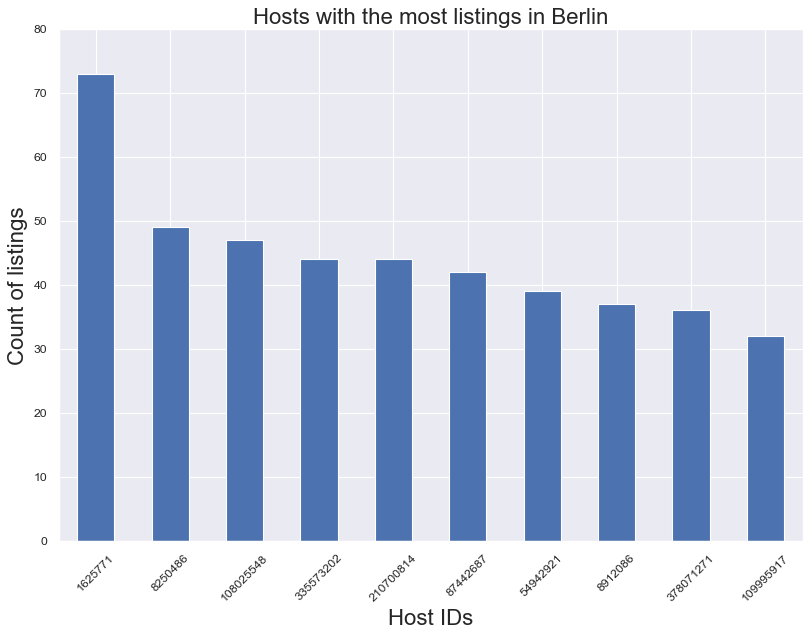

In [301]:
sns.set(rc={'figure.figsize':(12,8)})
viz_bar = top_host_id_by_listings.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Berlin', fontsize=20)
viz_bar.set_xlabel('Host IDs', fontsize=20)
viz_bar.set_ylabel('Count of listings', fontsize=20)
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


plt.savefig('../figures/top_hosts_by_lisings.png')

plt.show()

These are the top 10 host with the most listings.

In [13]:
proportion_top_10_host_listings = listings_s['host_id'].value_counts().head(10).sum() / listings_s.shape[0]
round(proportion_top_10_host_listings, 2)

0.02

We can see that top 10 hosts with the most listings represents only 2 percent of the whole listings. Basically this means, that the biggest proportion of listings is represent by partial hosts. Or in other words there are really huge competition.

### Which are top 10 most earning hosts?

In [14]:
estimated_earning = listings_s['price'] * listings_s['number_of_reviews'] * listings_s['minimum_nights']
estimated_earning = estimated_earning.astype(np.float64)
estimated_earning

0         21600.0
1         39825.0
2        820260.0
3          5481.0
4         74655.0
           ...   
19853         0.0
19854         0.0
19855         0.0
19856         0.0
19857         0.0
Length: 19858, dtype: float64

In [15]:
listings_s['estimated_earning'] = estimated_earning

In [16]:
top_host_id_by_earnings = listings_s.groupby('host_id')['estimated_earning'].sum().sort_values(ascending=False).head(10)
top_host_id_by_earnings

host_id
8605064      8763828.0
6074400      7463500.0
9734552      4917000.0
70880731     4693824.0
286894633    3650000.0
23042311     2689410.0
3939068      2214000.0
6963967      2121480.0
4446082      1972440.0
135973285    1893280.0
Name: estimated_earning, dtype: float64

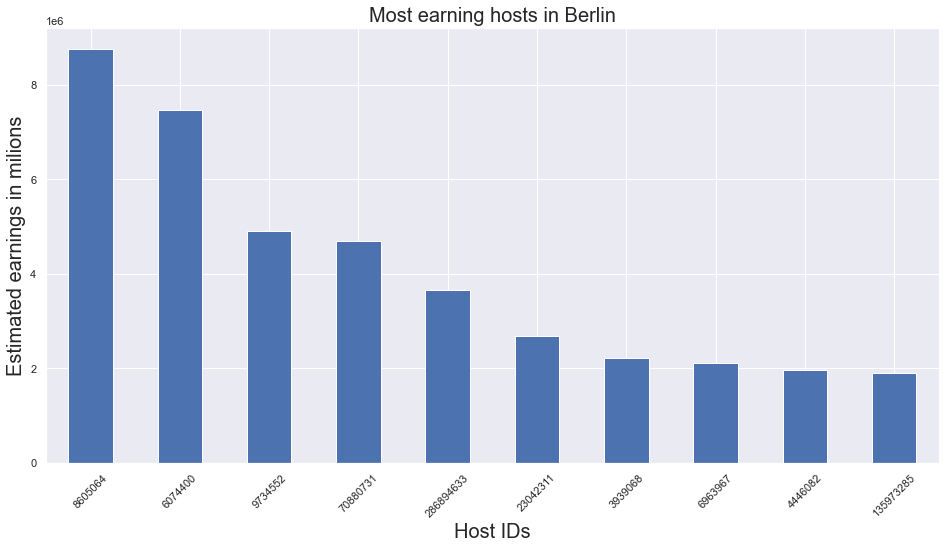

In [17]:
sns.set(rc={'figure.figsize':(16,8)})
viz_bar = top_host_id_by_earnings.plot(kind='bar')
viz_bar.set_title('Most earning hosts in Berlin', fontsize=20)
viz_bar.set_xlabel('Host IDs', fontsize=20)
viz_bar.set_ylabel('Estimated earnings in milions', fontsize=20)
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

plt.show()

From table above we can see that none of top 10 host by listings are presented in top 10 most earning hosts. 


### What are the proportion of room types?

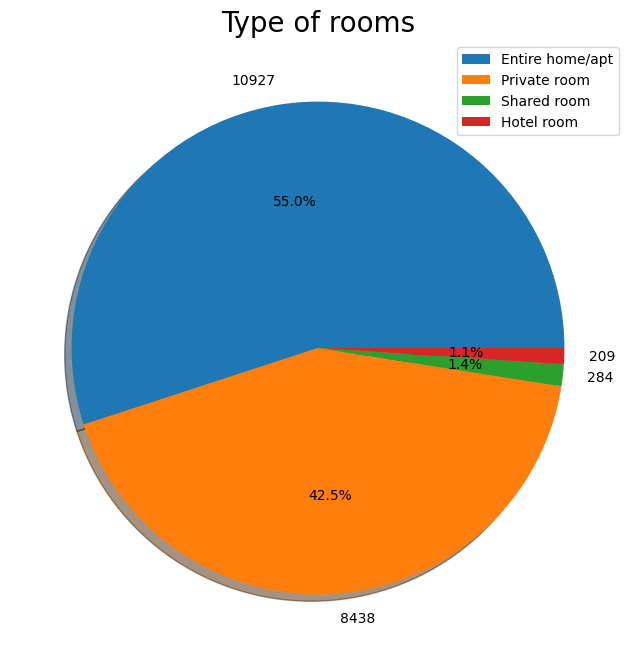

In [316]:
labels = listings_s['room_type'].value_counts().index
shape = listings_s['room_type'].value_counts().values

plt.figure(figsize=(12,8))
plt.pie(shape, labels=shape, autopct = '%1.1f%%', shadow=True)
plt.title('Type of rooms', fontsize=20)
plt.style.use('default')
plt.legend(labels)

plt.savefig('../figures/Proportion.png')

plt.show()

### Which are the top regions area?

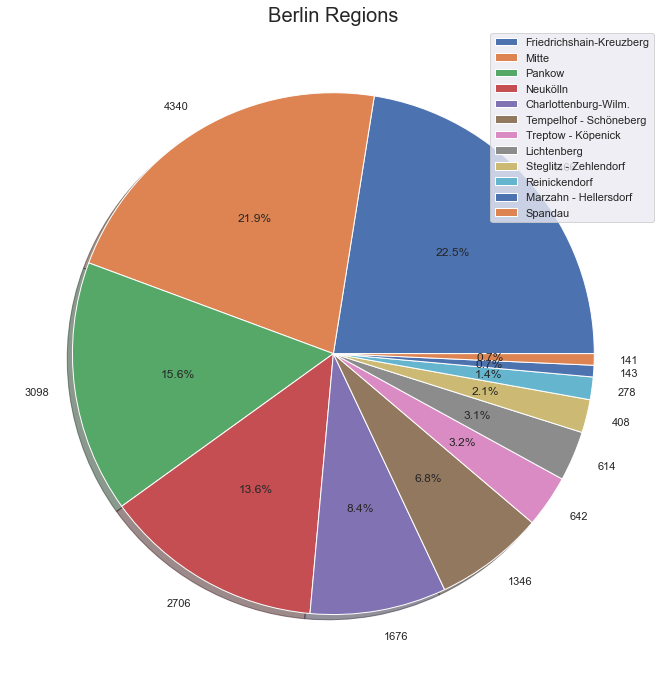

In [18]:
labels = listings_s['neighbourhood_group'].value_counts().index
shape = listings_s['neighbourhood_group'].value_counts().values

plt.figure(figsize=(12,12))
plt.pie(shape, labels=shape, autopct = '%1.1f%%', shadow=True)
plt.title('Berlin Regions', fontsize=20)
plt.legend(labels)
plt.show()

From the chart above, we see that the most of the listings are distributed in 6 regions covering 88.8% of all the listings. 

We see that the "Friedrischain-Kreuzber" has the most listings, followed by "Mitte" with difference of only 0.06% = 126 listings. 

In [19]:
listings_s['neighbourhood_group'].value_counts()

Friedrichshain-Kreuzberg    4466
Mitte                       4340
Pankow                      3098
Neukölln                    2706
Charlottenburg-Wilm.        1676
Tempelhof - Schöneberg      1346
Treptow - Köpenick           642
Lichtenberg                  614
Steglitz - Zehlendorf        408
Reinickendorf                278
Marzahn - Hellersdorf        143
Spandau                      141
Name: neighbourhood_group, dtype: int64

### Which are the top neighbourhoods?

In [20]:
listings_s['neighbourhood'].value_counts().head(10)

Frankfurter Allee Süd FK    1114
Alexanderplatz              1081
Tempelhofer Vorstadt        1015
Reuterstraße                 821
Brunnenstr. Süd              721
Rixdorf                      637
Neuköllner Mitte/Zentrum     601
südliche Luisenstadt         570
Prenzlauer Berg Südwest      564
Prenzlauer Berg Nordwest     542
Name: neighbourhood, dtype: int64

The highest number of listings are in "Frankfurter Allee Süd FK" 

### Listing Map

In [21]:
coord = listings_s.loc[:,['longitude','latitude']]
coord.describe()

longitude      latitude
count  19858.000000  19858.000000
mean      13.404362     52.510227
std        0.062236      0.031944
min       13.098390     52.340410
25%       13.367832     52.489850
50%       13.413860     52.509910
75%       13.438897     52.533090
max       13.757580     52.655980

In [330]:
plt.figure(figsize=(20,20))
map_folium = folium.Map([52.489850,13.367832],zoom_start=10.5)
HeatMap(listings_s[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

plt.savefig('../figures/heating_map.png')

<Figure size 1600x1600 with 0 Axes>

### Price 

In [24]:
listings_s['price'].describe()

count    19858.000000
mean        70.778930
std        120.383995
min          0.000000
25%         35.000000
50%         50.000000
75%         80.000000
max       8000.000000
Name: price, dtype: float64

### What is the median price?

In [323]:
np.median(listings_s['price'])

50.0

### What is the average price per night?

In [322]:
round(np.mean(listings_s['price']), 2)

70.78

### What is the cheapest accommodation?

In [23]:
listings_s[listings_s['price'] == 8]

id                                               name    host_id  \
1115   2161434                  Nice room in the heart of Berlin!    8864348   
5462  13630379            Zimmer im Süden Berlin ,im Grünen,Ruhig   42990588   
9442  22182082  Place with a view next to all the main attract...  162056711   

     host_name       neighbourhood_group             neighbourhood  latitude  \
1115     Maria  Friedrichshain-Kreuzberg       Karl-Marx-Allee-Süd  52.51323   
5462      Babs                  Neukölln                     Rudow  52.41631   
9442   Hussain  Friedrichshain-Kreuzberg  Frankfurter Allee Süd FK  52.49957   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
1115   13.43820  Private room      8              15                  1   
5462   13.48977  Private room      8               2                  0   
9442   13.46232   Shared room      8               1                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
1115  2014-03-26               0.01                               1   
5462         NaN                NaN                               1   
9442  2017-12-12               0.03                               1   

      availability_365  estimated_earning  
1115                 0              120.0  
5462                 0                0.0  
9442                 0                8.0

### What is the most expensive accommodation?

In [320]:
np.max(listings_s['price'])

8000

### Price map  `Tableau`

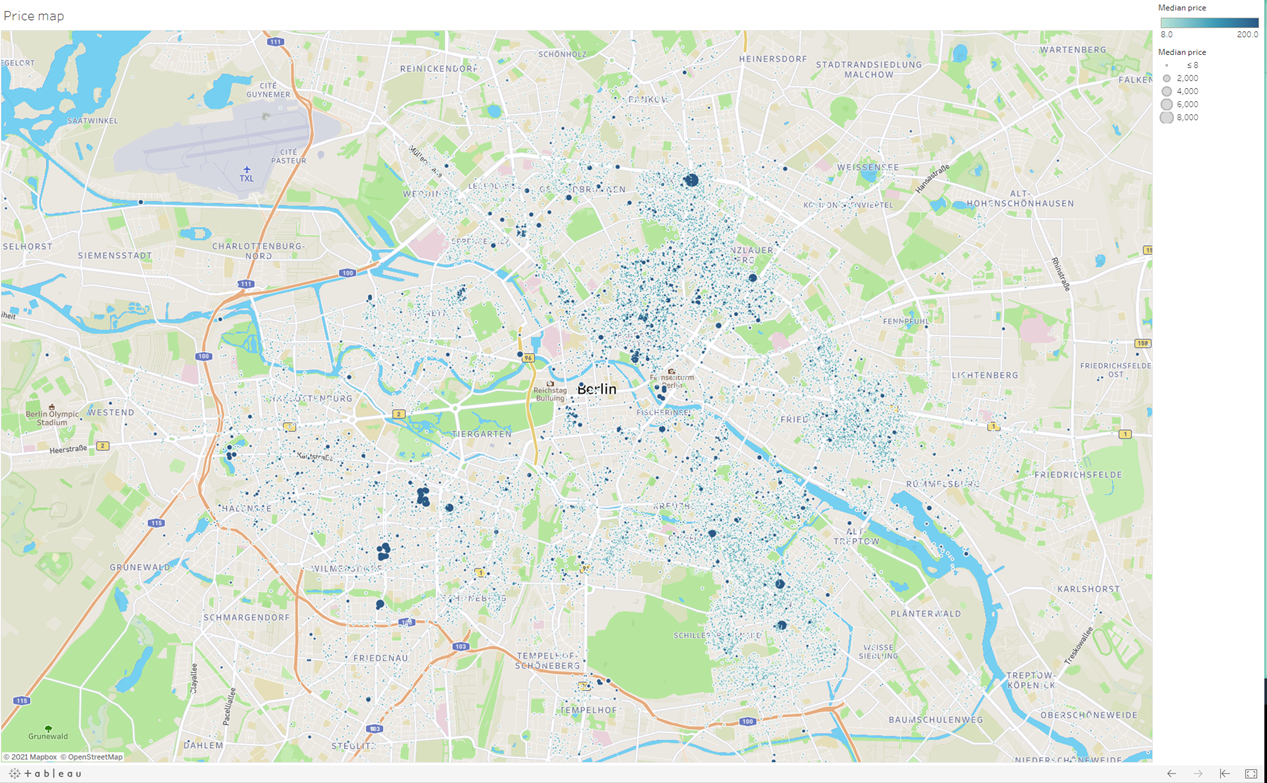

### Price distribution with box plot for each region

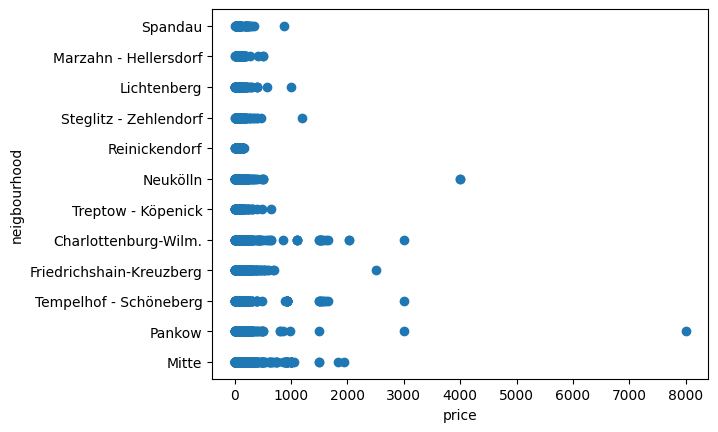

In [324]:
plt.scatter(listings_s['price'], listings_s['neighbourhood_group'])
plt.xlabel("price")
plt.ylabel("neigbourhood")
plt.style.use('default')
plt.show()

In [28]:
Q1 = listings_s['price'].quantile(0.25)
Q3 = listings_s['price'].quantile(0.75)
IQR = Q3 - Q1  

IQR

45.0

In [29]:
listings_s_1 = listings_s[(listings_s['price'] > 7) & (listings_s['price'] < 200)]



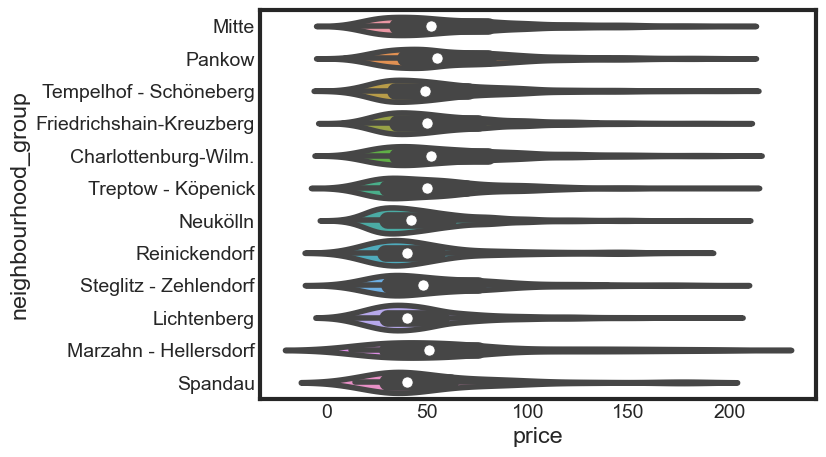

In [91]:
sns.violinplot(data=listings_s_1, x='price', y='neighbourhood_group')
plt.show()

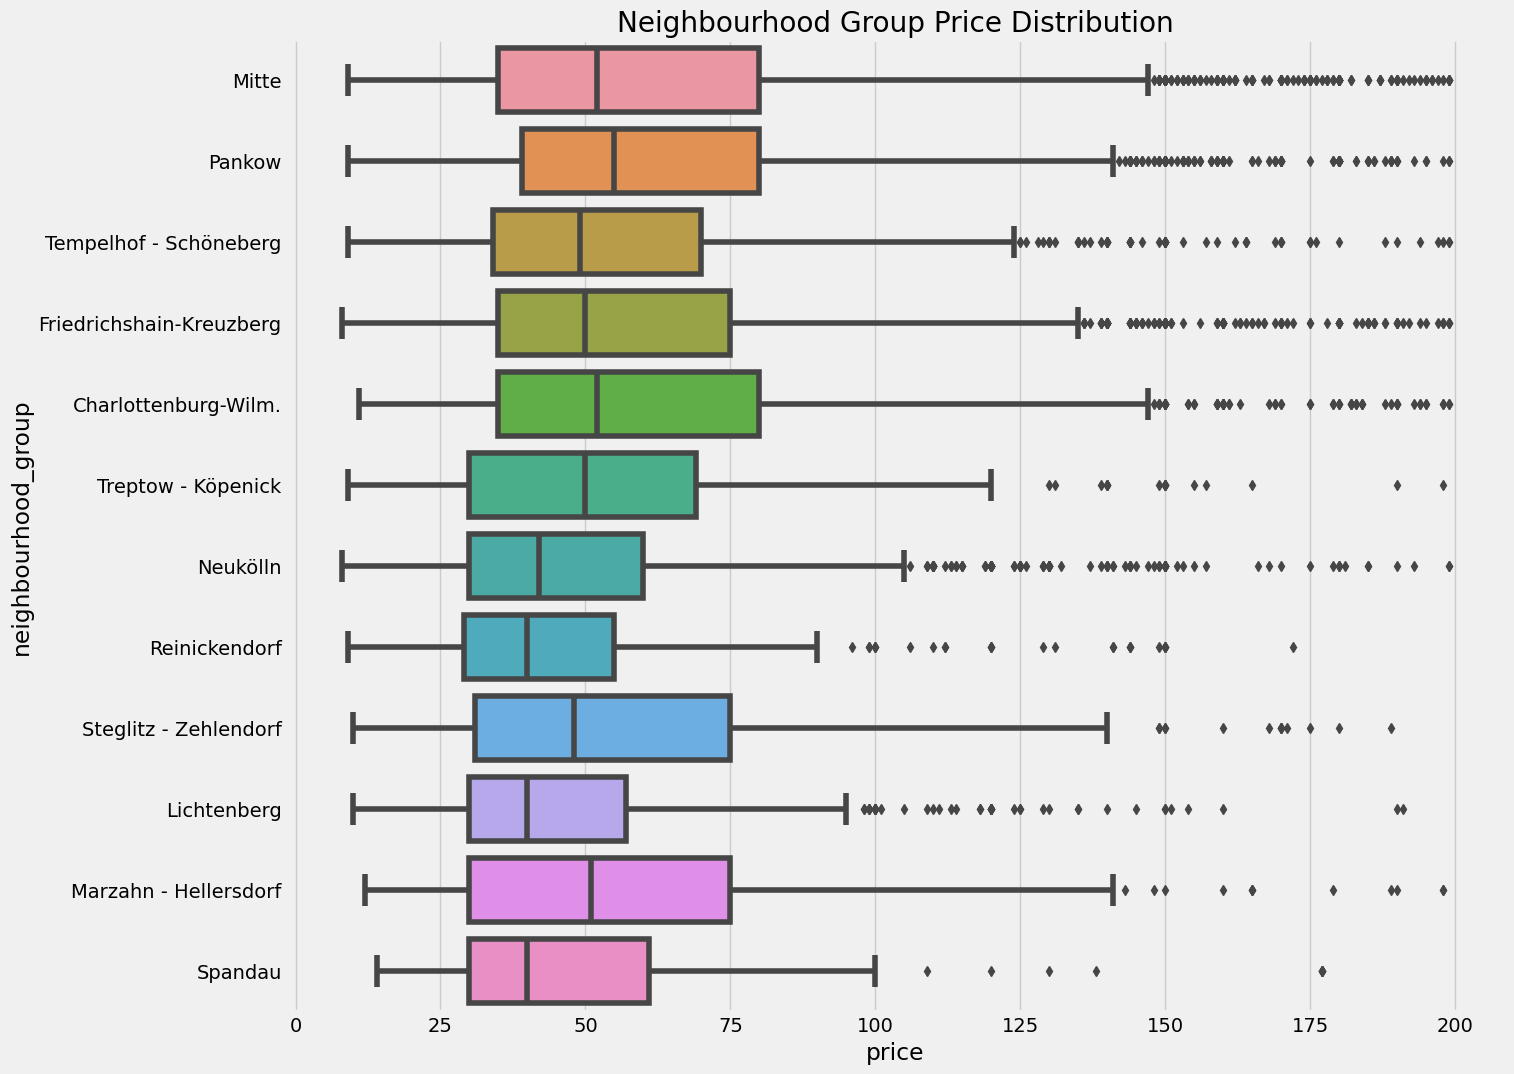

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='neighbourhood_group',x='price',data = listings_s_1)
plt.title('Neighbourhood Group Price Distribution')
plt.show()

### Price distribution by type of room

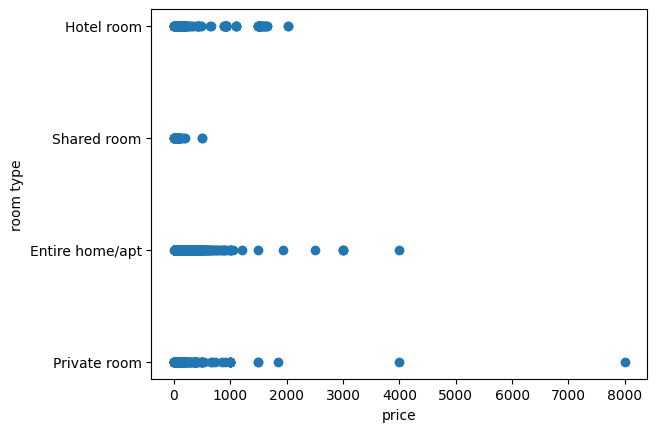

In [325]:
plt.scatter(listings_s['price'], listings_s['room_type'])
plt.xlabel("price")
plt.ylabel("room type")
plt.style.use('default')

plt.show()

In [33]:
listings_s_2 = listings_s[(listings_s['price'] > 7) & (listings_s['price'] < 250)]

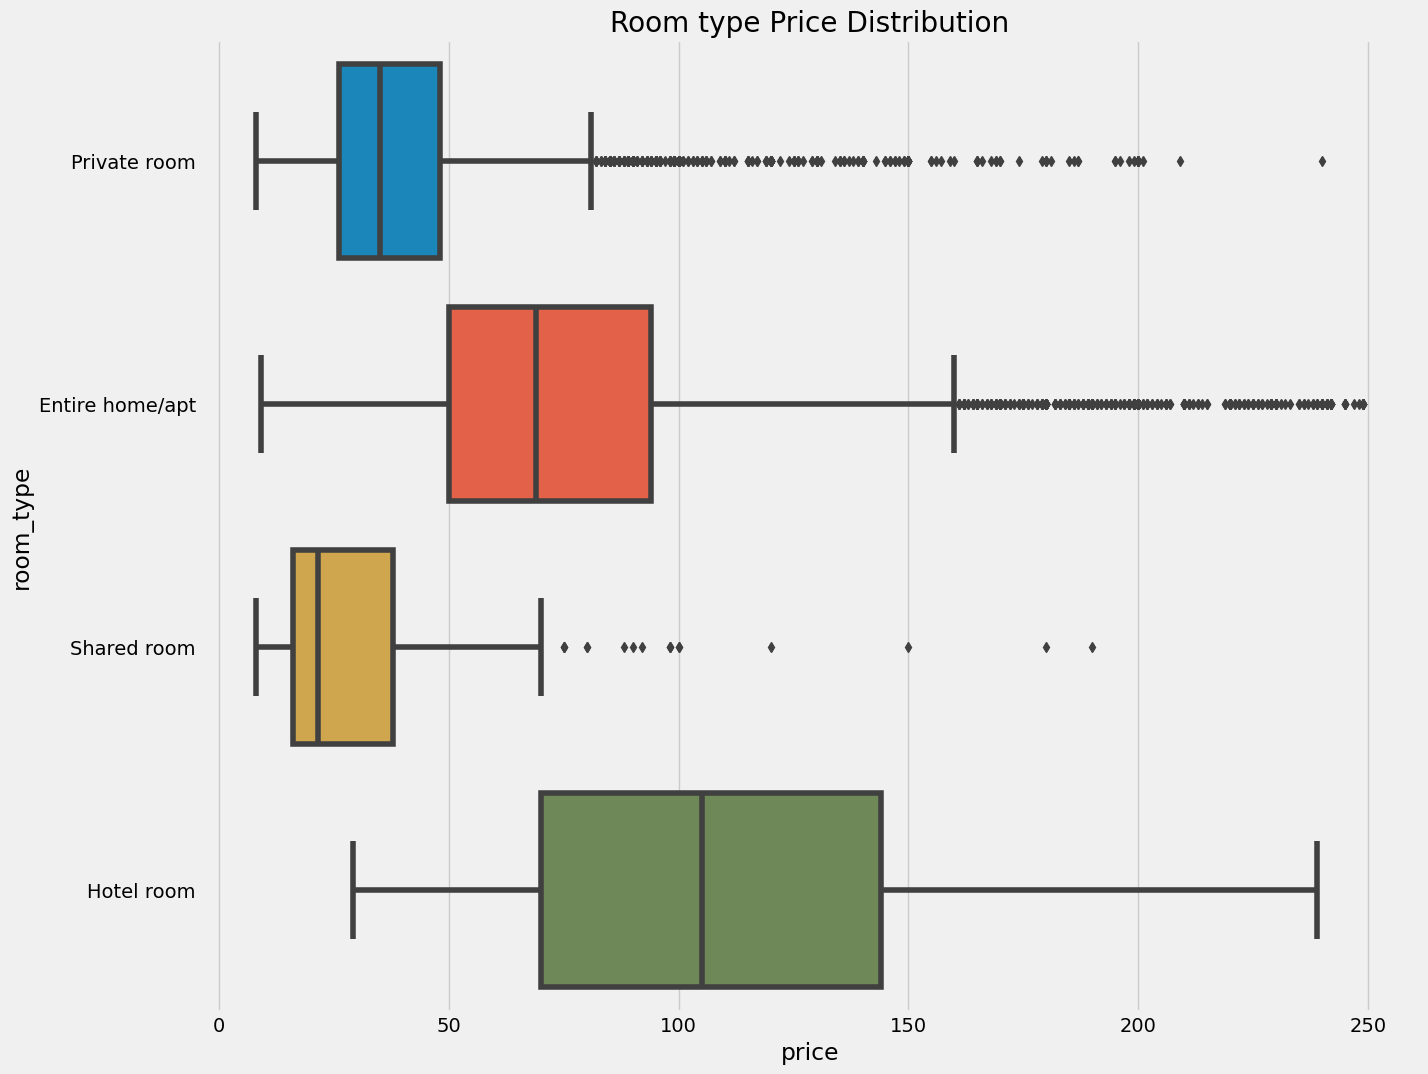

In [326]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='room_type', x='price', data = listings_s_2)
plt.title('Room type Price Distribution')
plt.show()


### Which are the top listing words?

In [35]:
#Crete empty list where we are going to put the name strings
names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in listings_s['name']:
    names.append(name)


#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s

#Create empty list where we are going to count the words
names_count = []

#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [307]:
from collections import Counter

words_frequency = Counter(names_count).most_common()

words_frequency_df = pd.DataFrame(words_frequency)
words_frequency_df.rename(columns={0:'Words',1:'Counts'},inplace=True)

words_frequency_df.head()

Words  Counts
0         in    9236
1       room    4532
2  apartment    3791
3     berlin    3125
4        the    2082

In [306]:
words_frequency_top_25 = words_frequency_df.copy()
words_frequency_top_25

words_frequency_top_25.drop(labels=[0, 3, 4, 5, 8, 9, 12, 19, 21, 22, 27, 28, 30, 37], axis=0, inplace=True)
words_frequency_top_25.reset_index(inplace=True)

words_frequency_top_words = words_frequency_top_25.copy()
#words_frequency_top_words

words_frequency_top_25 = words_frequency_top_25.head(25)

words_frequency_top_words.head()

#pd.set_option('display.max_rows', words_frequency_top_words.shape[0]+1)


index      Words  Counts
0      1       room    4532
1      2  apartment    3791
2      6       flat    1732
3      7       cozy    1581
4     10     zimmer    1227

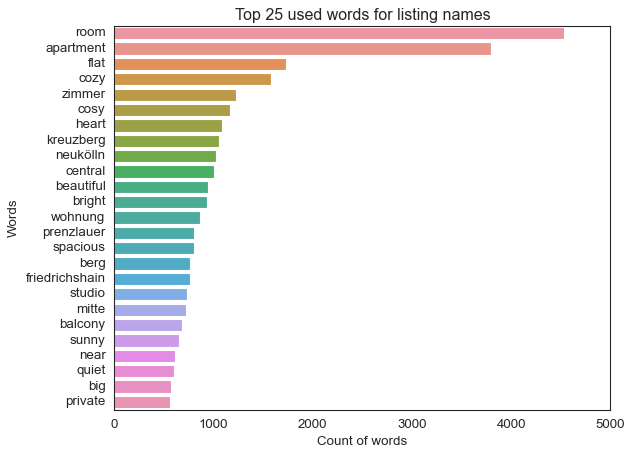

In [328]:
#words_frequency_top_25 = words_frequency_df.copy()
#words_frequency_top_25 = words_frequency_top_25.head(25)

viz_count = sns.barplot(x='Counts',y='Words', data = words_frequency_top_25)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Words')
viz_count.set_xlabel('Count of words')
plt.style.use('classic')
sns.set_style('white')
#viz_count.set_xticklabels(viz_count.get_xticklabels(), rotation=90)

plt.show()

# Cleaning the irrelevat words, symbols, stop words, `if`, `of`, `im`, etc.

In [329]:
#from wordcloud import WordCloud, ImageColorGenerator

#text = ' '.join(str(n).lower() for n in listings_s['name'])
#text



##Generate wordcloud image
#wordcloud = WordCloud(width=1920, height=1200, max_words=200, background_color = 'white').generate(text)
#plt.figure(figsize=(20,20))

##Display the image
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

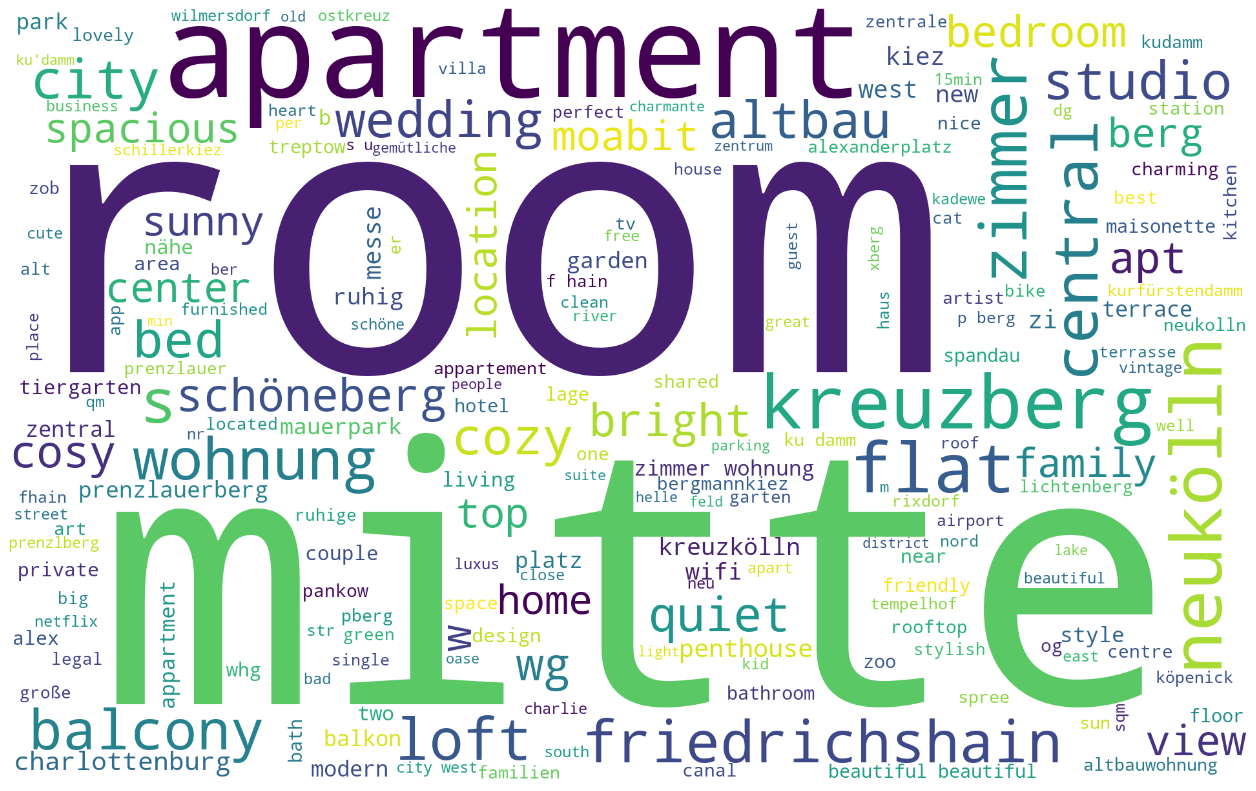

<Figure size 640x480 with 0 Axes>

In [283]:
from wordcloud import WordCloud, ImageColorGenerator
import re

text = ' '.join(str(n).lower() for n in words_frequency_top_words['Words'])
text = re.sub("berlin", "", text)

##Generate wordcloud image
wordcloud = WordCloud(width=1920, height=1200, max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(20,20))

##Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#

plt.savefig('../figures/top_200_words.png')

### Which are most reviewed listings?

In [40]:
listings_s.nlargest(10, 'number_of_reviews')

id                                              name   host_id  \
240    292864                      Lounge Room –  Alex in 5 Min    286494   
107    183206                 Cosy Studio with balcony in Mitte     98237   
432    652366                 Berlin Room Oriental Style P'Berg    286494   
216    264459                   Central, cosy and one-of-a-kind   1250154   
69     127708               Design Jewel in the midst of MITTE!    632174   
606    926670  clean calm and cosy Mitte-Apartment near Charité   1146238   
3050  7429427       Escape the Ordinary - with private bathroom  27577775   
141    221015  clean calm cosy central Berlin Wedding apartment   1146238   
1497  3419574              Central, cozy room at Alexanderplatz  17238564   
160    238396                   Within the city, calm and leafy   1250154   

            host_name neighbourhood_group            neighbourhood  latitude  \
240         Project A              Pankow  Prenzlauer Berg Südwest  52.53091   
107            Damian               Mitte           Alexanderplatz  52.52735   
432         Project A              Pankow  Prenzlauer Berg Südwest  52.53103   
216            Henrik              Pankow  Prenzlauer Berg Südwest  52.53203   
69          Stéphanie               Mitte           Alexanderplatz  52.52536   
606        Arzu & Tom               Mitte          Wedding Zentrum  52.54217   
3050             Noam              Pankow  Prenzlauer Berg Südwest  52.53155   
141        Arzu & Tom               Mitte          Wedding Zentrum  52.54063   
1497  Natali & Djalil               Mitte           Alexanderplatz  52.52404   
160            Henrik              Pankow  Prenzlauer Berg Südwest  52.53214   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
240    13.41711     Private room     48               1                618   
107    13.38986  Entire home/apt     45              16                573   
432    13.41687     Private room     28               1                570   
216    13.41705  Entire home/apt     35               3                557   
69     13.40488  Entire home/apt     92               2                548   
606    13.35120  Entire home/apt     67               4                530   
3050   13.41914     Private room     53               2                523   
141    13.35147  Entire home/apt     57               4                522   
1497   13.41977     Private room     48               2                512   
160    13.41519  Entire home/apt     30               3                488   

     last_review  reviews_per_month  calculated_host_listings_count  \
240   2020-03-22               5.72                               3   
107   2020-11-04               4.94                               2   
432   2020-11-01               5.47                               3   
216   2021-02-21               5.10                               2   
69    2020-10-28               4.81                               6   
606   2021-02-19               5.38                               2   
3050  2020-10-16               7.63                               1   
141   2020-12-14               4.54                               2   
1497  2020-03-08               6.32                               1   
160   2021-03-01               4.28                               2   

      availability_365  estimated_earning  
240                 49            29664.0  
107                 62           412560.0  
432                319            15960.0  
216                  1            58485.0  
69                 349           100832.0  
606                  3           142040.0  
3050               146            55438.0  
141                  6           119016.0  
1497                 0            49152.0  
160                  0            43920.0

# Predictions

## Correlation matrix

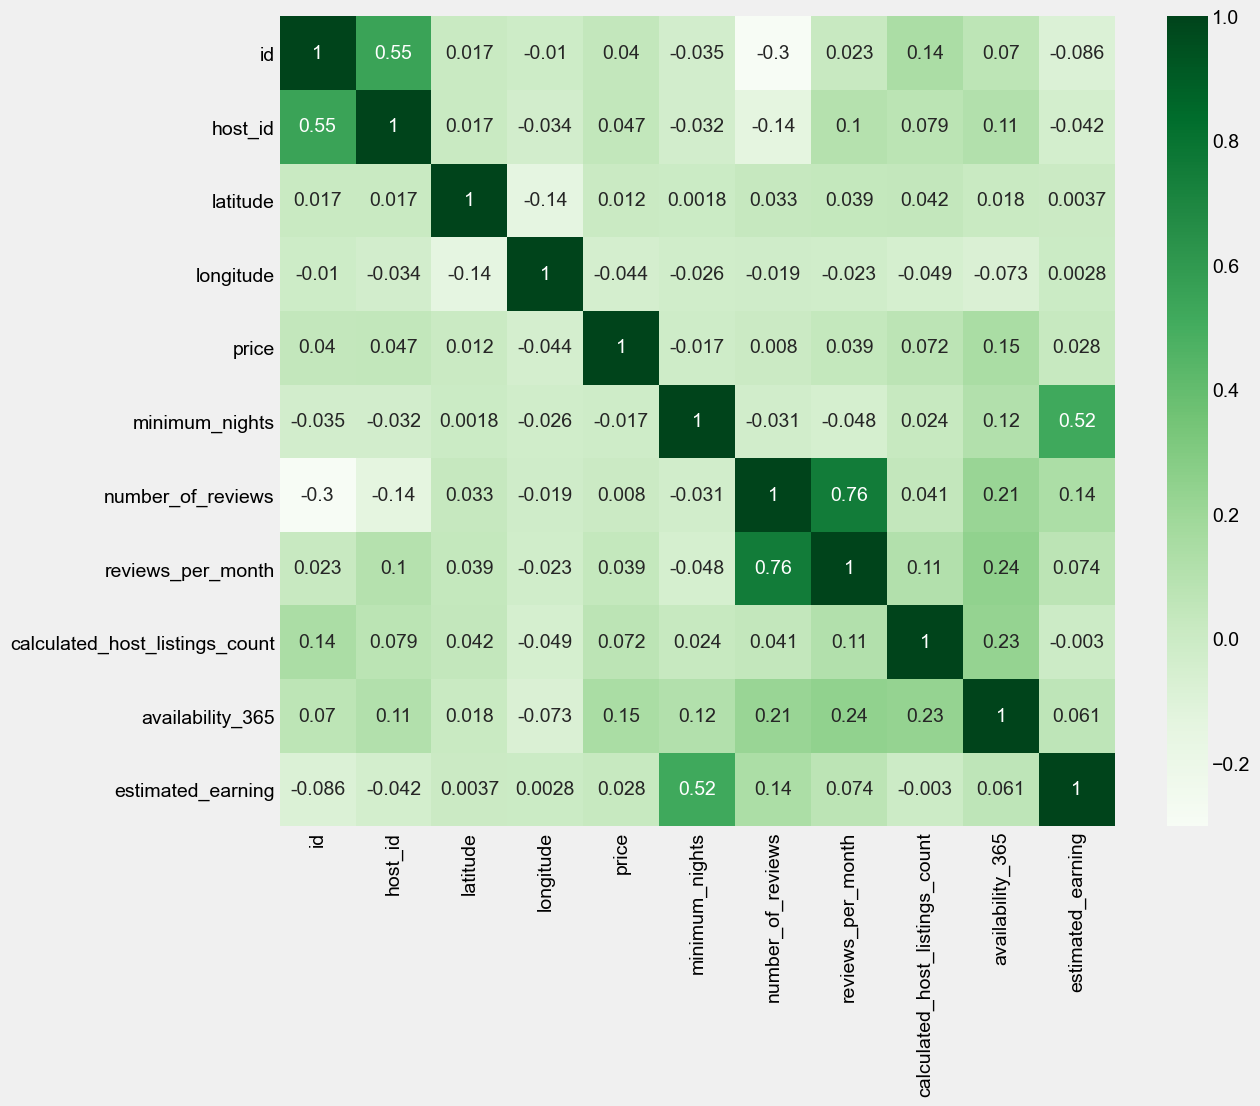

In [41]:
plt.figure(figsize=(12, 10))

sns.heatmap(listings_s.corr(), annot=True, cmap='Greens')
sns.set_style('white')
plt.show()

In [43]:
listings_d['price'] = listings_s['price']

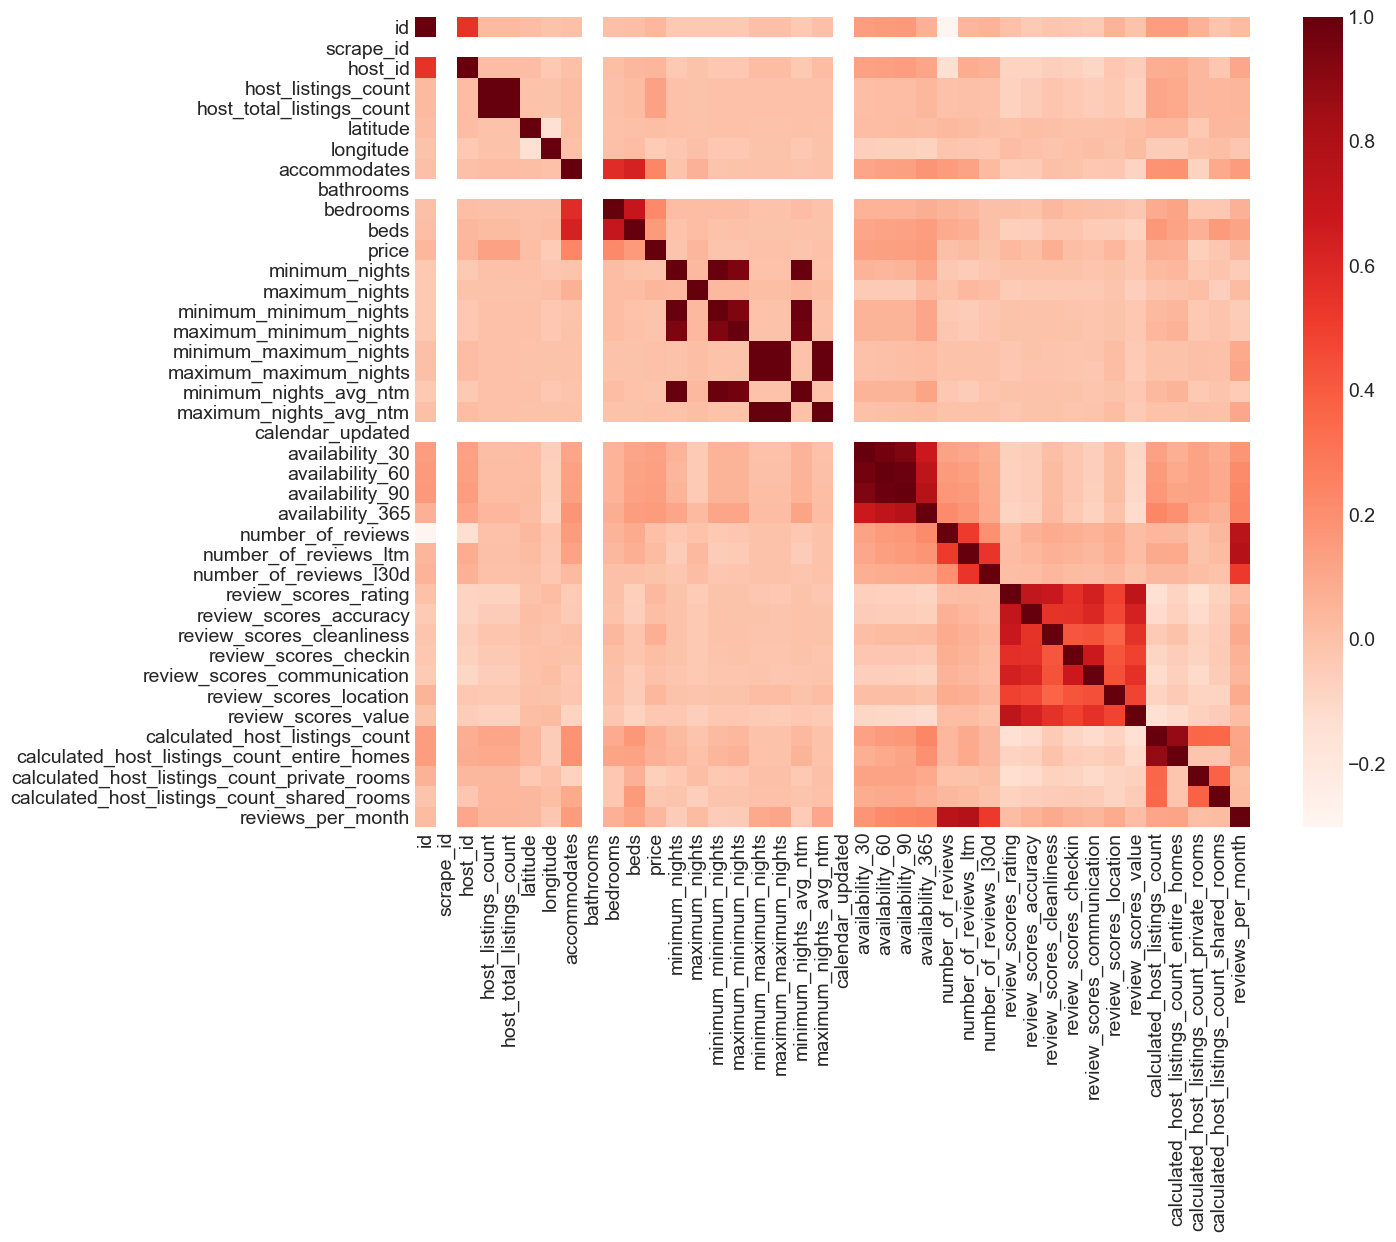

In [44]:
plt.figure(figsize=(12, 10))


sns.heatmap(listings_d.corr(), annot=False, cmap='Reds')
sns.set_style('white')
plt.show()

In [48]:
listings_d.corr()

id  scrape_id   host_id  \
id                                            1.000000        NaN  0.550205   
scrape_id                                          NaN        NaN       NaN   
host_id                                       0.550205        NaN  1.000000   
host_listings_count                           0.026030        NaN  0.013970   
host_total_listings_count                     0.026030        NaN  0.013970   
latitude                                      0.016759        NaN  0.016719   
longitude                                    -0.010174        NaN -0.034132   
accommodates                                  0.004722        NaN  0.007910   
bathrooms                                          NaN        NaN       NaN   
bedrooms                                      0.006480        NaN  0.011130   
beds                                          0.011023        NaN  0.038941   
price                                         0.039925        NaN  0.046858   
minimum_nights                               -0.035414        NaN -0.032346   
maximum_nights                               -0.036555        NaN -0.011149   
minimum_minimum_nights                       -0.034562        NaN -0.031791   
maximum_minimum_nights                       -0.032158        NaN -0.031835   
minimum_maximum_nights                        0.008034        NaN  0.017362   
maximum_maximum_nights                        0.008035        NaN  0.017362   
minimum_nights_avg_ntm                       -0.034691        NaN -0.032815   
maximum_nights_avg_ntm                        0.008034        NaN  0.017362   
calendar_updated                                   NaN        NaN       NaN   
availability_30                               0.143164        NaN  0.126227   
availability_60                               0.151690        NaN  0.135158   
availability_90                               0.156243        NaN  0.141796   
availability_365                              0.069500        NaN  0.114825   
number_of_reviews                            -0.301264        NaN -0.136249   
number_of_reviews_ltm                         0.044546        NaN  0.083465   
number_of_reviews_l30d                        0.059014        NaN  0.068469   
review_scores_rating                          0.003265        NaN -0.080507   
review_scores_accuracy                       -0.037430        NaN -0.087082   
review_scores_cleanliness                    -0.017986        NaN -0.059605   
review_scores_checkin                        -0.029387        NaN -0.067938   
review_scores_communication                  -0.040072        NaN -0.096892   
review_scores_location                        0.051575        NaN -0.030911   
review_scores_value                          -0.007807        NaN -0.056439   
calculated_host_listings_count                0.141798        NaN  0.078530   
calculated_host_listings_count_entire_homes   0.143161        NaN  0.082411   
calculated_host_listings_count_private_rooms  0.064663        NaN  0.037372   
calculated_host_listings_count_shared_rooms  -0.012749        NaN -0.024219   
reviews_per_month                             0.022708        NaN  0.101010   

                                              host_listings_count  \
id                                                       0.026030   
scrape_id                                                     NaN   
host_id                                                  0.013970   
host_listings_count                                      1.000000   
host_total_listings_count                                1.000000   
latitude                                                -0.006049   
longitude                                               -0.006971   
accommodates                                             0.018619   
bathrooms                                                     NaN   
bedrooms                                                 0.008052   
beds                                                 

In [49]:
abs(listings_d.corr())

id  scrape_id   host_id  \
id                                            1.000000        NaN  0.550205   
scrape_id                                          NaN        NaN       NaN   
host_id                                       0.550205        NaN  1.000000   
host_listings_count                           0.026030        NaN  0.013970   
host_total_listings_count                     0.026030        NaN  0.013970   
latitude                                      0.016759        NaN  0.016719   
longitude                                     0.010174        NaN  0.034132   
accommodates                                  0.004722        NaN  0.007910   
bathrooms                                          NaN        NaN       NaN   
bedrooms                                      0.006480        NaN  0.011130   
beds                                          0.011023        NaN  0.038941   
price                                         0.039925        NaN  0.046858   
minimum_nights                                0.035414        NaN  0.032346   
maximum_nights                                0.036555        NaN  0.011149   
minimum_minimum_nights                        0.034562        NaN  0.031791   
maximum_minimum_nights                        0.032158        NaN  0.031835   
minimum_maximum_nights                        0.008034        NaN  0.017362   
maximum_maximum_nights                        0.008035        NaN  0.017362   
minimum_nights_avg_ntm                        0.034691        NaN  0.032815   
maximum_nights_avg_ntm                        0.008034        NaN  0.017362   
calendar_updated                                   NaN        NaN       NaN   
availability_30                               0.143164        NaN  0.126227   
availability_60                               0.151690        NaN  0.135158   
availability_90                               0.156243        NaN  0.141796   
availability_365                              0.069500        NaN  0.114825   
number_of_reviews                             0.301264        NaN  0.136249   
number_of_reviews_ltm                         0.044546        NaN  0.083465   
number_of_reviews_l30d                        0.059014        NaN  0.068469   
review_scores_rating                          0.003265        NaN  0.080507   
review_scores_accuracy                        0.037430        NaN  0.087082   
review_scores_cleanliness                     0.017986        NaN  0.059605   
review_scores_checkin                         0.029387        NaN  0.067938   
review_scores_communication                   0.040072        NaN  0.096892   
review_scores_location                        0.051575        NaN  0.030911   
review_scores_value                           0.007807        NaN  0.056439   
calculated_host_listings_count                0.141798        NaN  0.078530   
calculated_host_listings_count_entire_homes   0.143161        NaN  0.082411   
calculated_host_listings_count_private_rooms  0.064663        NaN  0.037372   
calculated_host_listings_count_shared_rooms   0.012749        NaN  0.024219   
reviews_per_month                             0.022708        NaN  0.101010   

                                              host_listings_count  \
id                                                       0.026030   
scrape_id                                                     NaN   
host_id                                                  0.013970   
host_listings_count                                      1.000000   
host_total_listings_count                                1.000000   
latitude                                                 0.006049   
longitude                                                0.006971   
accommodates                                             0.018619   
bathrooms                                                     NaN   
bedrooms                                                 0.008052   
beds                                                 

In [50]:
abs_cor = abs(listings_d.corr())
abs_cor['price'].sort_values(ascending=False)

price                                           1.000000
accommodates                                    0.235557
bedrooms                                        0.220126
beds                                            0.152403
availability_365                                0.148767
availability_90                                 0.136775
availability_60                                 0.134211
availability_30                                 0.127958
host_total_listings_count                       0.127281
host_listings_count                             0.127281
review_scores_cleanliness                       0.074722
calculated_host_listings_count                  0.072363
calculated_host_listings_count_entire_homes     0.068843
calculated_host_listings_count_private_rooms    0.066809
host_id                                         0.046858
maximum_nights                                  0.046427
longitude                                       0.044345
review_scores_location         

Observed linear correlation is to low in order to build linear regression model